# K Nearest Neighbors
You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Get the Data

In [3]:
df = pd.read_csv("Classified Data", index_col=0 )

In [4]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


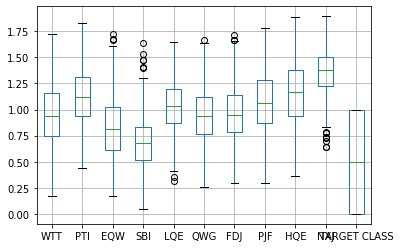

In [5]:
df.boxplot()

## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [11]:
df_feature = pd.DataFrame(scaled_features, columns=df.columns[:-1] )
df_feature.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_feature, df['TARGET CLASS'], random_state=30, test_size=0.3)

### Using KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [16]:
pred = knn.predict(X_test)

### Predictions and Evaluations

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
print(confusion_matrix(y_test, pred))

[[128  16]
 [ 10 146]]


In [21]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       144
           1       0.90      0.94      0.92       156

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



### Choosing K Value

Lets go ahead and use Elbow method to pick a good value for K

In [22]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) 

Text(0.5, 0, 'K Value')

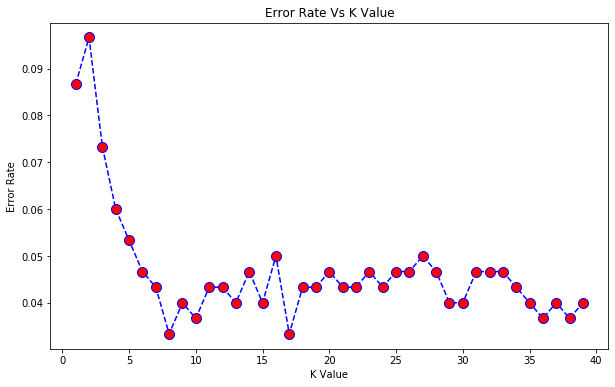

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate Vs K Value')
plt.ylabel('Error Rate')
plt.xlabel('K Value')

Here we can see that that after arouns K>27 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

In [25]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=28)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=28')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=28


[[137   7]
 [  7 149]]


              precision    recall  f1-score   support

           0       0.95      0.95      0.95       144
           1       0.96      0.96      0.96       156

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

